In [26]:
import pickle
import os
import globals as gl
import matplotlib.pyplot  as plt
import PcmPy as pcm
import numpy as np

plt.style.use('default')

/home/UWO/memanue5/Documents/GitHub/PcmPy/PcmPy/util.py:225: RuntimeWarning: invalid value encountered in matmul
  M = C[None, :, :] @ (G @ C.T)  # (T, P, P)


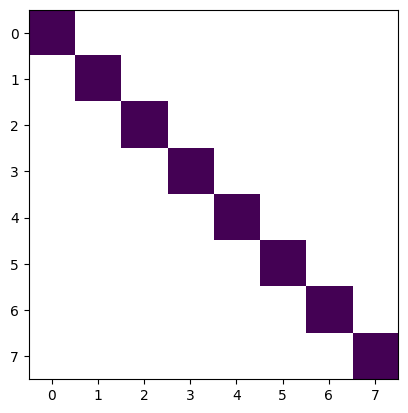

In [27]:
f = open(os.path.join(gl.baseDir, gl.pcmDir, f'M.trained_untrained.p'), "rb")
M = pickle.load(f)
Gc = M[0].Gc
D = pcm.G_to_dist(Gc)

plt.imshow(D[1])

plt.show()

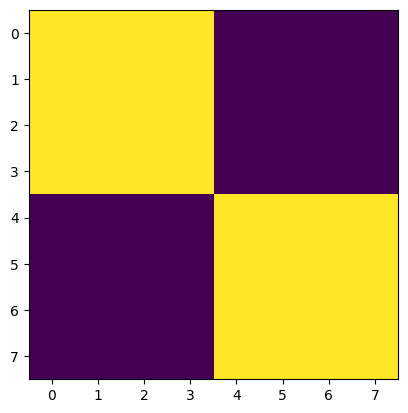

In [28]:
G_w = 1 - Gc[0]
G_w = G_w / np.trace(G_w)
D_w = pcm.G_to_dist(G_w)

plt.imshow(D_w)
plt.show()

In [30]:
C = pcm.centering(8)

trained_untrained_bt = C @ np.array([1, 1, 1, 1, -1, -1, -1, -1])

G_trained_untrained_bt = np.outer(trained_untrained_bt, trained_untrained_bt)
G_trained_untrained_wt = 1 - G_trained_untrained_bt
G_I = np.eye(8)
G_trained_untrained_wt += G_I
G_component = np.array([G_trained_untrained_bt / np.trace(G_trained_untrained_bt),
                        G_trained_untrained_wt / np.trace(G_trained_untrained_wt),
                        G_I / np.trace(G_I)])

In [31]:
D = pcm.G_to_dist(G_component[1])

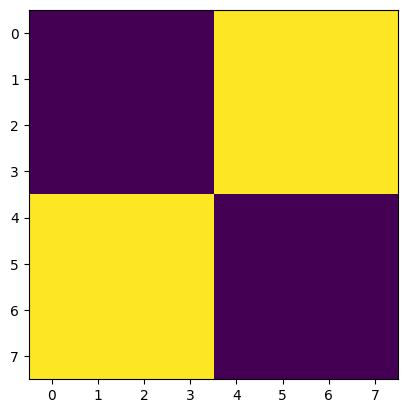

In [35]:
n = 8
a = np.r_[np.ones(4), np.zeros(4)]   # trained indicator
b = np.r_[np.zeros(4), np.ones(4)]   # untrained indicator

sigma2 = .2     # within-set variance
rho = 0.8        # correlation between trained and untrained latent factors (<=1)

G = sigma2 * (np.outer(a, a) + np.outer(b, b)) \
  + sigma2 * rho * (np.outer(a, b) + np.outer(b, a))

D = pcm.G_to_dist(G)

plt.imshow(D)